In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('../data/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# PRE-PROCESSING

In [4]:
df=data.copy()
df.shape

(768, 9)

In [5]:
df=df.drop(['BloodPressure'],axis=1)

In [6]:
df

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,35,0,33.6,0.627,50,1
1,1,85,29,0,26.6,0.351,31,0
2,8,183,0,0,23.3,0.672,32,1
3,1,89,23,94,28.1,0.167,21,0
4,0,137,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101,48,180,32.9,0.171,63,0
764,2,122,27,0,36.8,0.340,27,0
765,5,121,23,112,26.2,0.245,30,0
766,1,126,0,0,30.1,0.349,47,1


In [7]:
df[['Glucose', 'SkinThickness', 'Insulin', 'BMI']]=df[['Glucose', 'SkinThickness', 'Insulin', 'BMI']].replace(0,np.nan)

In [8]:
df.fillna(df.median(), inplace=True)


In [10]:
x = df.drop('Outcome',axis=1)
y = df['Outcome']

In [12]:
x

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,35.0,125.0,33.6,0.627,50
1,1,85.0,29.0,125.0,26.6,0.351,31
2,8,183.0,29.0,125.0,23.3,0.672,32
3,1,89.0,23.0,94.0,28.1,0.167,21
4,0,137.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...
763,10,101.0,48.0,180.0,32.9,0.171,63
764,2,122.0,27.0,125.0,36.8,0.340,27
765,5,121.0,23.0,112.0,26.2,0.245,30
766,1,126.0,29.0,125.0,30.1,0.349,47


In [14]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)


In [18]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset = train_test_split(x,test_size=0.2,random_state=0)
Y_trainset,Y_testset = train_test_split(y,test_size=0.2,random_state=0)


In [22]:
Y_testset.value_counts()

Outcome
0    107
1     47
Name: count, dtype: int64

In [26]:
Y_trainset.value_counts()

Outcome
0    393
1    221
Name: count, dtype: int64

# modelisation 

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

In [31]:
model_1 = RandomForestClassifier(random_state=0)
model_2 = make_pipeline(PolynomialFeatures(2), SelectKBest(f_classif, k=10),
                      RandomForestClassifier(random_state=0))

# Procédure d'évaluation

In [34]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [36]:
def evaluation(model):
    
    model.fit(X_trainset,Y_trainset)
    ypred = model.predict(X_testset)
    
    print(confusion_matrix(Y_testset,ypred))
    print(classification_report(Y_testset,ypred))
     
    N, train_score, val_score = learning_curve(model,X_trainset,Y_trainset,cv=4,scoring='f1',train_sizes=np.linspace(0.1,1,10))
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

[[92 15]
 [18 29]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       107
           1       0.66      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.78      0.79      0.78       154



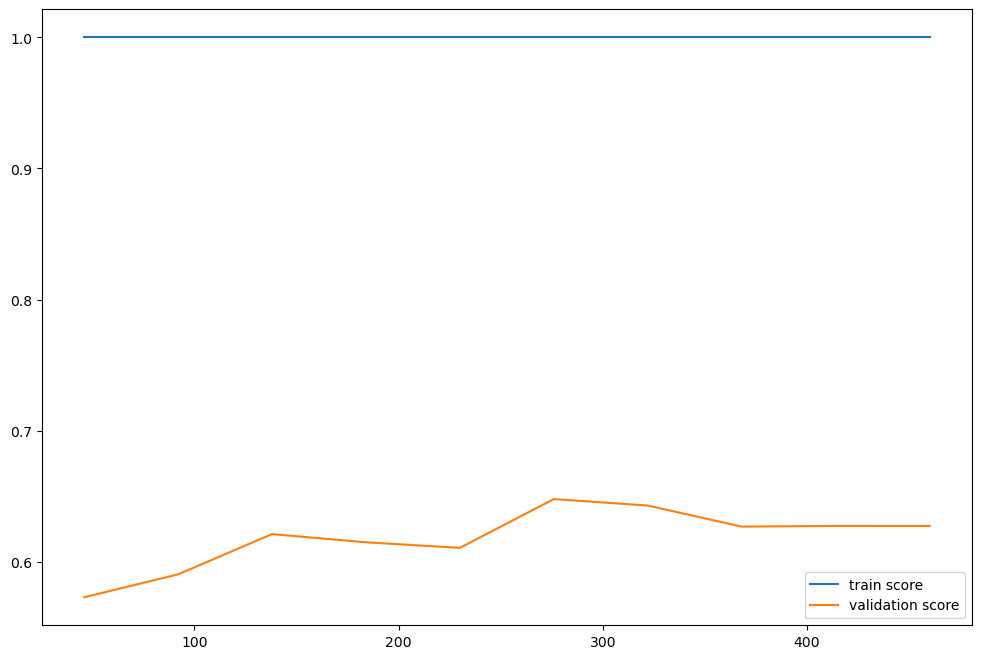

In [38]:
evaluation(model_1)